# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


15

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# set up lists to hold response info
lat = []
temp_max = []
hum = []
cloud = []
wind = []
long = []
city_api = []
country = []
datetime_api = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Viewing the straight Json
# weather_response = requests.get(query_url + city)
# weather_json = weather_response.json()
# city_id = weather_json["id"]
# city_name = weather_json["name"]

    # Loop through the list of cities and perform a request for data on each
for city in cities:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        #Error handling
        try:
            city_id = weather_json["id"]
            city_name = weather_json["name"]
        
        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
    
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            city_api.append(response["name"])
            datetime_api.append(response["dt"])
            
            print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            
        except (KeyError, IndexError):
            print(f"Missing information for City: {city_name}. Skipping city.")
        
#print(f"The latitude information received is: {lat}")
#print(f"The latitude information received is: {long}")
#print(f"The temperature information received is: {temp_max}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloudyiness information received is: {cloud}")
#print(f"The wind information received is: {wind}")
#print(f"The city information received is: {city_api}")
#weather_json


Retrieving information for City: Buraydah and City ID is: 107304 
Retrieving information for City: Villacarrillo and City ID is: 2509606 
Retrieving information for City: Henties Bay and City ID is: 3356832 
Retrieving information for City: Albany and City ID is: 5106834 
Missing information for City: Albany. Skipping city.
Retrieving information for City: Upernavik and City ID is: 3418910 
Retrieving information for City: Tuatapere and City ID is: 2180815 
Missing information for City: Tuatapere. Skipping city.
Retrieving information for City: Coquimbo and City ID is: 3893629 
Retrieving information for City: Makkaveyevo and City ID is: 2020559 
Retrieving information for City: Rikitea and City ID is: 4030556 
Retrieving information for City: Salalah and City ID is: 286621 
Retrieving information for City: Te Anau and City ID is: 2181625 
Retrieving information for City: Opatija and City ID is: 3194099 
Retrieving information for City: Kalmunai and City ID is: 1242110 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "Longitude": long,
    "Latitude": lat,
    "City": city_api,
    "Country": country,
    "Temp Max": temp_max,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (MPH)": wind,
    "Time": datetime_api, 
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()    

,Longitude,Latitude,City,Country,Temp Max,Humidity,Cloudiness (%),Wind Speed (MPH),Time
0,43.97,26.33,Buraydah,SA,77.00,33,20,6.93,1571000133
1,-3.08,38.12,Villacarrillo,ES,66.18,41,0,6.14,1571000134
2,14.28,-22.12,Henties Bay,NA,63.00,87,73,5.99,1571000028
3,-73.75,42.65,Albany,US,62.60,41,75,4.70,1570999793
4,-56.15,72.79,Upernavik,GL,19.13,46,0,6.87,1570999814


In [6]:
weather_data.to_csv("output_data/Weather_Data_export.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

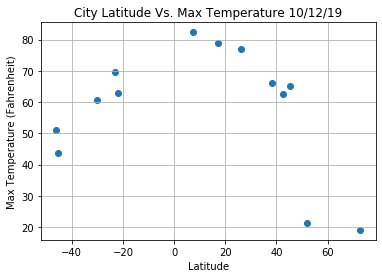

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temp Max"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature 10/12/19")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

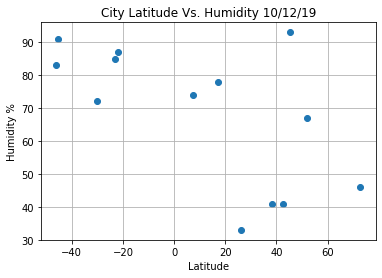

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity 10/12/19")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

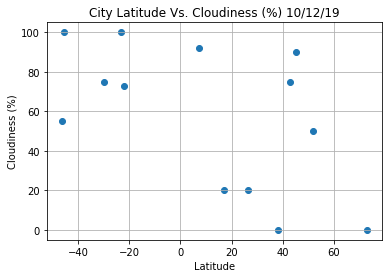

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%) 10/12/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

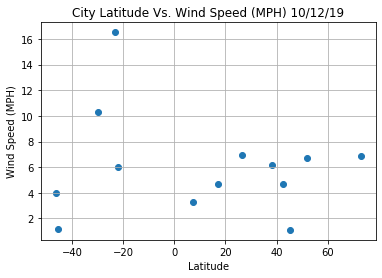

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (MPH) 10/12/19")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Analysis